# 20240418筆記

上一次上課：
* 影像處理的基礎
* Histogram
* Image Convolution (Filtering)

Slido: https://ppt.cc/fFjIQx

基礎影像處理套件：
* Pillow
* Scikit-Image
* OpenCV

影像雜訊
* Pepper and Salt
* Guassian Noise
* White Noise

## Pepper and Salt

In [ ]:
import numpy as np

In [ ]:
import skimage as ski

In [ ]:
lena = ski.io.imread('lena.png')

In [ ]:
import plotly.express as px

In [ ]:
px.imshow(lena)

In [ ]:
lena.shape

In [ ]:
gray = ski.color.rgb2gray(lena)

In [ ]:
px.imshow(gray, color_continuous_scale="gray")

In [ ]:
gray.shape

In [ ]:
np.random.randint(0, 440)

In [ ]:
x = np.random.randint(0, 440, 100)

In [ ]:
x

In [ ]:
y = np.random.randint(0, 440, 100)

In [ ]:
gray[x, y] = 0

In [ ]:
px.imshow(gray, color_continuous_scale="gray")

In [ ]:
x1 = np.random.randint(0, 440, 100)
y1 = np.random.randint(0, 440, 100)

In [ ]:
gray[x1, y1] = 1

In [ ]:
px.imshow(gray, color_continuous_scale="gray")

In [ ]:
gray.dtype

## 自己做彩色轉單色

Gray = 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue

In [ ]:
lena.shape

In [ ]:
glena = lena[:,:,0]*0.299+lena[:,:,1]*0.587+lena[:,:,2]*0.114

In [ ]:
glena.dtype

In [ ]:
glena = glena.astype('uint')

In [ ]:
px.imshow(glena, color_continuous_scale="gray")

In [ ]:
xp = np.random.randint(0, 440, 100)
yp = np.random.randint(0, 440, 100)
xs = np.random.randint(0, 440, 100)
ys = np.random.randint(0, 440, 100)

In [ ]:
glena[xp, yp] = 0
glena[xs, ys] = 255

In [ ]:
px.imshow(glena, color_continuous_scale="gray")

In [ ]:
data = np.random.randint(0, 20, (3, 3))

In [ ]:
data

In [ ]:
np.median(data)

In [ ]:
newlena = np.zeros_like(glena)

for i in range(1, 439):
    for j in range(1, 439):
        newlena[i, j] = np.median(glena[i-1:i+2, j-1:j+2])

In [ ]:
px.imshow(newlena, color_continuous_scale="gray")

## OpenCV使用簡介

### 讀圖及秀圖

In [ ]:
import cv2
import plotly.express as px
import numpy as np

In [ ]:
cvlena = cv2.imread('lena.png')

In [ ]:
type(cvlena)

In [ ]:
px.imshow(cvlena)

In [ ]:
px.imshow(cvlena[:,:,::-1])

In [ ]:
cv2.imshow("Test", cvlena)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imshow("Test", cvlena)
cv2.waitKey(5000)
cv2.destroyAllWindows()

### 彩色轉單色

In [ ]:
gcvlena = cv2.cvtColor(cvlena, cv2.COLOR_BGR2GRAY)

In [ ]:
px.imshow(gcvlena, color_continuous_scale='gray')

In [ ]:
xp = np.random.randint(0, 440, 200)
yp = np.random.randint(0, 440, 200)
xs = np.random.randint(0, 440, 200)
ys = np.random.randint(0, 440, 200)

In [ ]:
gcvlena[xp, yp] = 0
gcvlena[xs, ys] = 255

In [ ]:
px.imshow(gcvlena, color_continuous_scale='gray')

In [ ]:
mgcvlena = cv2.medianBlur(gcvlena, 3)

In [ ]:
px.imshow(mgcvlena, color_continuous_scale='gray')

In [ ]:
gcvlena01 = cv2.cvtColor(cvlena, cv2.COLOR_BGR2GRAY)
xp = np.random.randint(0, 440, 20000)
yp = np.random.randint(0, 440, 20000)
xs = np.random.randint(0, 440, 20000)
ys = np.random.randint(0, 440, 20000)
gcvlena01[xp, yp] = 0
gcvlena01[xs, ys] = 255

In [ ]:
px.imshow(gcvlena01, color_continuous_scale='gray')

In [ ]:
mgcvlena01 = cv2.medianBlur(gcvlena01, 5)

In [ ]:
px.imshow(mgcvlena01, color_continuous_scale="gray")

### 高斯雜訊 (Gaussian Noise)

In [ ]:
np.random.randn(2, 4)

In [ ]:
gcvlena.shape

In [ ]:
noise = np.random.randn(*gcvlena.shape)

In [ ]:
noise.shape

In [ ]:
np.mean(noise)

In [ ]:
np.var(noise)

In [ ]:
px.imshow(noise, color_continuous_scale="gray")

In [ ]:
gcvlena02 = cv2.cvtColor(cvlena, cv2.COLOR_BGR2GRAY)
gcvlena03 = gcvlena02.copy().astype(int)

In [ ]:
gcvlena04 = gcvlena03 + noise*30

In [ ]:
px.imshow(gcvlena03, color_continuous_scale="gray")

In [ ]:
px.imshow(gcvlena04, color_continuous_scale="gray")

## 白雜訊 (White Noise)

In [ ]:
np.random.uniform(-1, 1, (2, 4))

In [ ]:
white = np.random.uniform(-1, 1, gcvlena.shape)

In [ ]:
px.imshow(white, color_continuous_scale="gray")

In [ ]:
gcvlena05 = gcvlena02.copy().astype(int)
gcvlena06 = gcvlena05 + white*30

In [ ]:
px.imshow(gcvlena06, color_continuous_scale="gray")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(gcvlena04, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(gcvlena06, cmap="gray")

In [ ]:
cv2.blur?

In [ ]:
fgcvlena04 = cv2.blur(gcvlena04, (3, 3))

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(gcvlena04, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(fgcvlena04, cmap="gray")

In [ ]:
cv2.imshow("HW#1", gcvlena04.astype("uint8"))
cv2.imshow("HW#2", gcvlena06.astype("uint8"))
cv2.waitKey(0)
cv2.destroyAllWindows()

## matplotlib subplot 簡單複習

* plt.subplot()
* plt.subplots()
* plt.subplot2grid()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.array([1, 2, 3, 4])/4

In [ ]:
x1

In [ ]:
x2

In [ ]:
x1 = x**1
x2 = x**2
x3 = x**3
x4 = x**4

In [ ]:
plt.subplot(2, 2, 1)
plt.plot(x1)
plt.subplot(2, 2, 2)
plt.plot(x2)
plt.subplot(2, 2, 3)
plt.plot(x3)
plt.subplot(2, 2, 4)
plt.plot(x4)

In [ ]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x1)
axes[0, 1].plot(x2)
axes[1, 0].plot(x3)
axes[1, 1].plot(x4)

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(gcvlena04, cmap="gray")
axes[1].imshow(gcvlena06, cmap="gray")

In [ ]:
axes

In [ ]:
plt.subplot2grid((2, 2), (0, 0))
plt.plot(x1)
plt.subplot2grid((2, 2), (0, 1))
plt.plot(x2)
plt.subplot2grid((2, 2), (1, 0))
plt.plot(x3)
plt.subplot2grid((2, 2), (1, 1))
plt.plot(x4)

In [ ]:
plt.subplot2grid((3, 3), (0, 0))
plt.plot(x1)
plt.subplot2grid((3, 3), (0, 1))
plt.plot(x2)
plt.subplot2grid((3, 3), (0, 2))
plt.plot(x3)
plt.subplot2grid((3, 3), (1, 0), colspan=3, rowspan=2)
plt.plot(x4)

## 綜合練習 01

請畫出一個2x2的圖，左上角是Lena的彩色原圖，右上角是紅色的channel的圖，左下角是綠色的channel的圖，右下角是藍色的channel的圖。

In [ ]:
import skimage

In [ ]:
lena = skimage.io.imread('lena.png')

In [ ]:
plt.imshow(lena)

In [ ]:
red = lena.copy()
green = lena.copy()
blue = lena.copy()

In [ ]:
red[:,:,1:] = 0
green[:,:,[0, 2]] = 0
blue[:,:,:2] = 0

In [ ]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(lena)
axes[0, 1].imshow(red)
axes[1, 0].imshow(green)
axes[1, 1].imshow(blue)

In [ ]:
plt.imshow(255 - lena)

## 綜合練習 02

使用 Line Notify 傳送即時訊息通知給自己。

https://notify-bot.line.me/en/

In [115]:
# 在 windows 上面的 jupyter notebook/lab 用這個
!curl -o linenotify.py https://raw.githubusercontent.com/vcdemy/linenotify/main/py/linenotify.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   818  100   818    0     0   1437      0 --:--:-- --:--:-- --:--:--  1440
100   818  100   818    0     0   1436      0 --:--:-- --:--:-- --:--:--  1440


In [116]:
from linenotify import Notify

In [117]:
token = ""

In [118]:
Notify(token, "Hello World!")

<Response [200]>

In [119]:
Notify(token, "Hello World!", img="lena.png")

<Response [200]>

In [120]:
r = Notify(token, "Hello World!", img="lena.png")

In [121]:
r.headers

{'Server': 'nginx', 'Date': 'Thu, 18 Apr 2024 06:32:37 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Keep-Alive': 'timeout=9', 'Vary': 'Accept-Encoding', 'X-RateLimit-Limit': '1000', 'X-RateLimit-ImageLimit': '50', 'X-RateLimit-Remaining': '997', 'X-RateLimit-ImageRemaining': '48', 'X-RateLimit-Reset': '1713425298', 'X-Robots-Tag': 'noindex, nofollow, nosnippet, noarchive', 'Content-Encoding': 'gzip'}

## 影像侵蝕(erode)及膨脹(dilate)

In [122]:
ocr = skimage.io.imread('ocr.jpg')

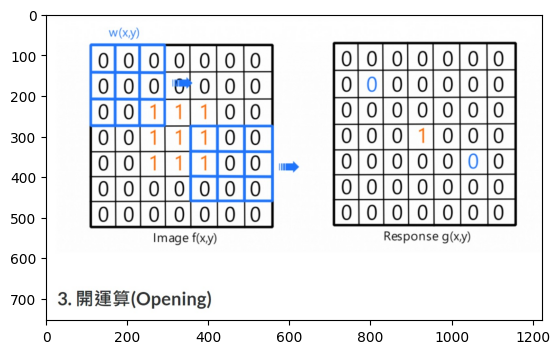

In [123]:
plt.imshow(ocr)